In [2]:
import numpy as np
import pandas as pd
import ast 
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [62]:
df = pd.read_csv('../../pre-processing/results/eval_features.csv')
df.sample(5)

,filename,head_movement,feature_lengths,flicker,blink,lip_movement_variance,ssim,psnr,pulse,fake
30,22.mp4,"[2.02270770072937, 1.9770842790603638, -0.4999...","[45.0, 5.0, 5.0, 50.0, 50.0, 45.0, 45.0]","[-0.873748779296875, 0.8978877067565918, -0.87...","[0.0, 0.0, 1.0, 0.0, 4.0]","[0.0, 0.0, 0.9958423972129822, 1.1907334327697...","[0.8509023785591125, -0.8295851349830627, 0.85...","[0.8665544986724854, -1.0347120761871338, 0.91...","[-0.041038405150175095, -0.16477228701114655, ...",0
39,1.mp4,"[-1.4240232706069946, -1.6330912113189697, -0....","[45.0, 5.0, 5.0, 50.0, 50.0, 45.0, 45.0]","[-0.8024726510047913, 0.9610748887062073, -0.8...","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.6962536573410034, 0.9072183966636658, 0.535...","[0.7372211813926697, -0.4134090542793274, 0.72...","[0.812169075012207, -0.9757665395736694, 0.885...","[0.7118573188781738, 0.6669775247573853, 0.502...",0
20,20.mp4,"[-1.4955594539642334, -1.4955594539642334, 0.7...","[45.0, 5.0, 5.0, 50.0, 50.0, 45.0, 45.0]","[-0.6257169842720032, 0.06792561709880829, -0....","[1.0, 1.0, 4.0, 0.0, 0.0]","[0.9858757853507996, 1.0108314752578735, 1.062...","[0.628549337387085, -0.09974837303161621, 0.71...","[0.8321359753608704, -0.6424777507781982, 1.79...","[0.1425800770521164, 0.08506369590759277, 0.96...",0
2,16.mp4,"[0.6948734521865845, 0.6948734521865845, -1.52...","[45.0, 5.0, 5.0, 50.0, 50.0, 45.0, 45.0]","[-0.6950110197067261, -0.36478304862976074, -0...","[2.0, 0.0, 2.0, 0.0, 0.0]","[0.5715476274490356, 1.1409581899642944, 0.878...","[0.8107283115386963, 0.2951658368110657, 0.372...","[0.7612811326980591, -0.31889185309410095, -0....","[-1.547477126121521, -2.145853042602539, 0.163...",1
49,25.mp4,"[-0.2987101674079895, -0.2987101674079895, -1....","[45.0, 5.0, 5.0, 50.0, 50.0, 45.0, 45.0]","[-0.8936598300933838, 1.6838544607162476, -0.8...","[1.0, 2.0, 3.0, 0.0, 5.0]","[0.6473968625068665, 0.7297318577766418, 0.839...","[0.9240463972091675, -1.176152229309082, 0.875...","[1.6695133447647095, -1.1567567586898804, 0.60...","[0.5324967503547668, 0.5324967503547668, 0.532...",0


In [63]:
df = df.drop(columns=["filename"])

In [64]:
# Option 1: Concatenate all features (flatten nested lists)

# Convert all columns except 'fake' from string to list
for col in df.columns:
    if col != "fake":
        df[col] = df[col].apply(ast.literal_eval)

# This flattens each row of lists into a single feature vector
X = np.array([np.concatenate(row.values) for _, row in df.drop(columns=["fake"]).iterrows()])
y = df["fake"].values

In [59]:
#option 2: summarize each list with aggregate features (mean, std, etc.)
for col in df.columns:
    if col != "fake":
        df[col] = df[col].apply(ast.literal_eval)

agg_df = df.copy()
for col in df.columns:
    if col != "fake":
        agg_df[f"{col}_mean"] = df[col].apply(np.mean)
        agg_df[f"{col}_std"] = df[col].apply(np.std)
        agg_df[f"{col}_max"] = df[col].apply(np.max)
        agg_df[f"{col}_min"] = df[col].apply(np.min)

# drop the original list-based columns
agg_df = agg_df.drop(columns=[col for col in df.columns if col != "fake"])

# final X and y
X = agg_df.drop(columns=["fake"]).values
y = agg_df["fake"].values

ValueError: malformed node or string: [-0.6548720002174377, -0.6548720002174377, 0.4522581994533539, 0.5139342546463013, 0.2034948766231537, 0.1407788246870041, -1.787536859512329, -1.1030699014663696, 1.333985447883606, 1.5558992624282837, -1.3708363771438599, -1.14990234375, 1.7452603578567505, 1.721242070198059, -0.06234375759959221, 0.1652769297361374, -0.00011247343354625627, 0.160660982131958, -0.5748622417449951, -0.6343830823898315, 0.7886582016944885, 1.039997935295105, -1.0969918966293335, -1.9862115383148193, -0.7591721415519714, 1.039997935295105, 0.8209331631660461, 0.6335243582725525, 0.1464260369539261, -0.6271620988845825, -0.3926331698894501, -0.05907904729247093, -0.16584447026252747, -0.16584447026252747, -1.3072221279144287, -1.757888913154602, 1.6929113864898682, 1.2925204038619995, 0.630695104598999, 0.2323853224515915, 0.24268010258674622, 0.8644585013389587, -1.3795623779296875, -1.871825933456421, 0.7951322197914124, 1.3529629707336426, -0.7950707674026489, 0.7329812049865723, -0.24751339852809906, 0.3057575225830078]

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state=27)

In [66]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Function to run model

In [67]:
def evaluate_model(model, model_name):
    print(f"Training {model_name}...")
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # For AUC (probabilities for positive class)
    
    # Calculate accuracy, AUC, and confusion matrix
    acc = metrics.accuracy_score(y_test, y_pred)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = round(metrics.auc(fpr, tpr), 2)
    cm = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print the classification report for the model
    print(f"Classification Report for {model_name}:\n{class_report}\n")

    # Plot confusion matrix for the model
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap='Blues_r', fmt='g', ax=ax)
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Actual Values")
    ax.set_title(f"Confusion Matrix for {model_name}")
    plt.show()

    return acc, auc, cm

Logistic Regression

Training Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.61      0.64      0.62        22
           1       0.33      0.31      0.32        13

    accuracy                           0.51        35
   macro avg       0.47      0.47      0.47        35
weighted avg       0.51      0.51      0.51        35




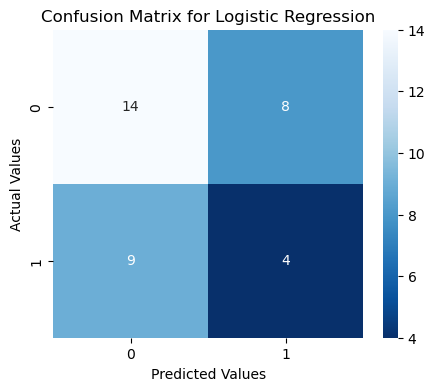

In [68]:
log_reg = LogisticRegression(solver='liblinear')
log_reg_acc, log_reg_auc, log_reg_cm = evaluate_model(log_reg, "Logistic Regression")

Decision Tree

Training Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.65      0.50      0.56        22
           1       0.39      0.54      0.45        13

    accuracy                           0.51        35
   macro avg       0.52      0.52      0.51        35
weighted avg       0.55      0.51      0.52        35




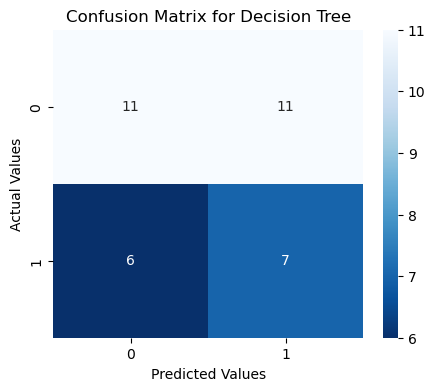

In [69]:
dt = DecisionTreeClassifier()
dt_acc, dt_auc, dt_cm = evaluate_model(dt, "Decision Tree")

Naive Bayes


Training Naive Bayes...
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.50      0.18      0.27        22
           1       0.33      0.69      0.45        13

    accuracy                           0.37        35
   macro avg       0.42      0.44      0.36        35
weighted avg       0.44      0.37      0.33        35




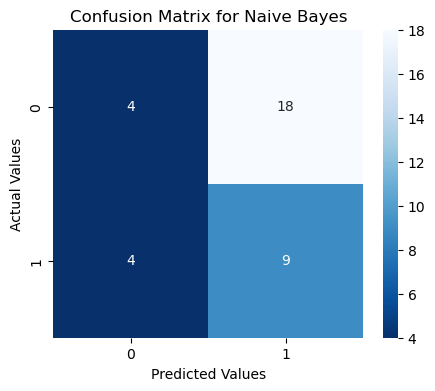

In [70]:
nb = GaussianNB()
nb_acc, nb_auc, nb_cm = evaluate_model(nb, "Naive Bayes")

K Nearest Neighbours

Training KNN...
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.56      0.68      0.61        22
           1       0.12      0.08      0.10        13

    accuracy                           0.46        35
   macro avg       0.34      0.38      0.35        35
weighted avg       0.40      0.46      0.42        35




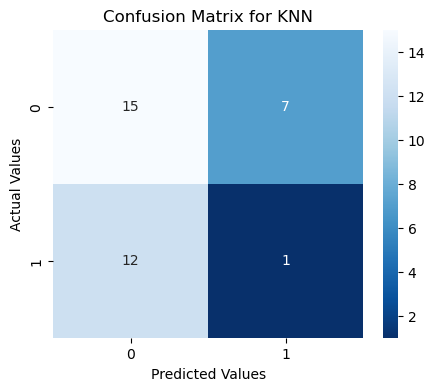

In [71]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree', n_jobs=-1)
knn_acc, knn_auc, knn_cm = evaluate_model(knn, "KNN")

SVM

Training SVM...
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        22
           1       0.00      0.00      0.00        13

    accuracy                           0.63        35
   macro avg       0.31      0.50      0.39        35
weighted avg       0.40      0.63      0.49        35




c:\Users\user\anaconda3\envs\is217_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\is217_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\is217_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


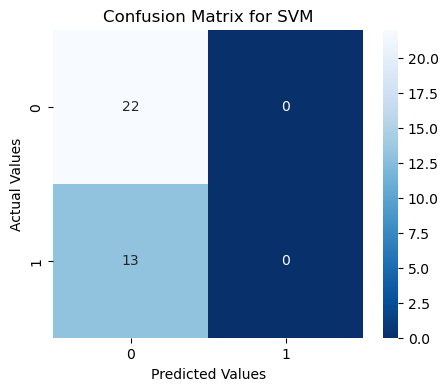

In [72]:
svm = SVC(probability=True)
svm_acc, svm_auc, svm_cm = evaluate_model(svm, "SVM")

Random Forrest

Training Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        22
           1       0.56      0.38      0.45        13

    accuracy                           0.66        35
   macro avg       0.62      0.60      0.60        35
weighted avg       0.64      0.66      0.64        35




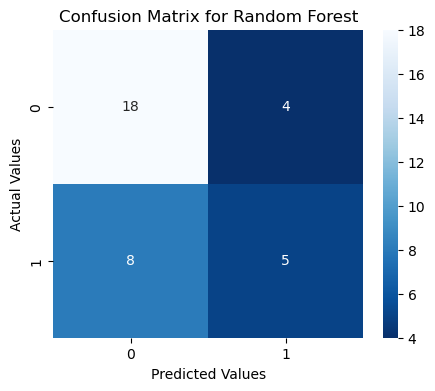

In [73]:
rf = RandomForestClassifier()
rf_acc, rf_auc, rf_cm = evaluate_model(rf, "Random Forest")

In [74]:
print("\nSummary of Results:")
models = ["Logistic Regression", "SVM", "KNN", "Decision Tree", "Random Forest", "Naive Bayes"]
accuracies = [log_reg_acc, svm_acc, knn_acc, dt_acc, rf_acc, nb_acc]
auc_scores = [log_reg_auc, svm_auc, knn_auc, dt_auc, rf_auc, nb_auc]
confusion_matrices = [log_reg_cm, svm_cm, knn_cm, dt_cm, rf_cm, nb_cm]

results = {
    "Model": models,
    "Accuracy": accuracies,
    "AUC": auc_scores,
    "Confusion Matrix": confusion_matrices
}

# Create the DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)


Summary of Results:
                 Model  Accuracy   AUC    Confusion Matrix
0  Logistic Regression  0.514286  0.40   [[14, 8], [9, 4]]
1                  SVM  0.628571  0.58  [[22, 0], [13, 0]]
2                  KNN  0.457143  0.43  [[15, 7], [12, 1]]
3        Decision Tree  0.514286  0.52  [[11, 11], [6, 7]]
4        Random Forest  0.657143  0.55   [[18, 4], [8, 5]]
5          Naive Bayes  0.371429  0.45   [[4, 18], [4, 9]]
